#### Maxime Langlet

#### PHYS-F303

#### Devoir Physique Statistique

# 1. 06_02_random_numbers

## Challenge 1
Pour ce premier challenge, il est demandé de se renseigner sur les différents générateurs de nombres aléatoires dans Python et de comparer ceux-ci avec la version implementée dans le mooc.
Pour ce faire, importons les différentes librairies.

In [2]:
from random import random
from random import gauss
from random import expovariate

import numpy as np
from matplotlib import pyplot

Commençons par expérimenter avec la fonction random de Python. Nous allons générer 100000 nombres aléatoires et vérifier que nous avons bien une distribution uniforme sur \[0,1\].

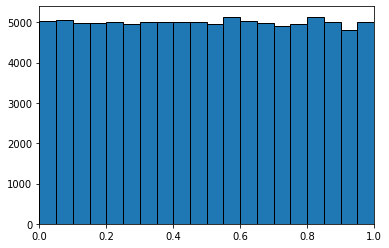

In [2]:
N=100000
x =[]
for i in range(N):
    x.append(random())
    

binwidth=0.05
pyplot.xlim(0,1)
bins=np.arange(0.,2., binwidth)
pyplot.hist(x,bins,density=False, ec='black')
pyplot.rcParams["figure.figsize"] = (9,3.5)

pyplot.show()

On a en effet la distribution uniforme souhaitée, évidemment il faut garder en tête que c'est aléatoires et de ce fait que les "bins" dans l'histogramme auront des tailles légérement différentes. Cependant nous avons le résultat voulu.

## Distribution Exponentielle

Essayons la fonction de distribution exponentielle implémentée dans Python, celle-ci est selon la documentation la fonction expovariate().

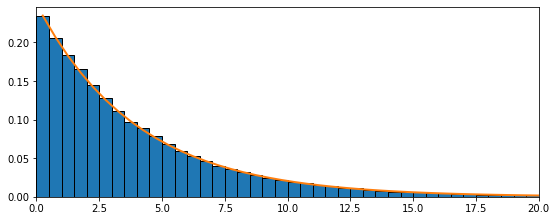

In [3]:
#Avec Python

N=100000
x =[]
for i in range(N):
    x.append(expovariate(0.25))
    
binwidth=0.5
pyplot.xlim(0,20)
bins=np.arange(0.,21., binwidth)
pyplot.hist(x,bins,density=True, ec='black');

alpha = 0.25
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

pyplot.show()

On observe bien la distribution exponentielle attendue, comparons ce résultat avec le même procéder en utilisant numpy. Nous verrons que les 2 graphiques seront pratiquements indissociables.

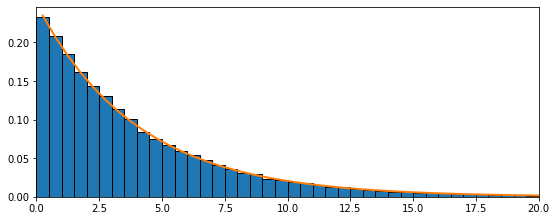

In [4]:
#Avec numpy

alpha = 0.25 # rate of the exponential distribution
x = np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=np.arange(0.,21., binwidth)
pyplot.hist(y,bins,density=True, ec='black');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

pyplot.show()

## Distribution Gaussienne
Répétons cette comparaison avec les distributions gaussiennes de Python et Numpy respectivement afin de voir si le résultat précédent est conservé.

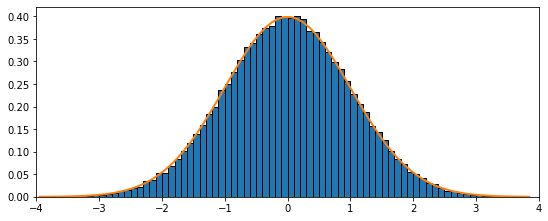

In [5]:
#Avec random

N=100000
x=[]
mu=0
sigma=1
gauss(mu,sigma)
for i in range(N):
    x.append(gauss(mu,sigma))
    
binwidth=0.1
pyplot.xlim(-4,4)
bins=np.arange(-4.,4., binwidth)
pyplot.hist(x,bins,density=True, ec='black');

xc = bins[:-1] + binwidth/2
normale = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((xc-mu)/sigma)**2)
pyplot.plot(xc,normale, lw=2)

pyplot.show()

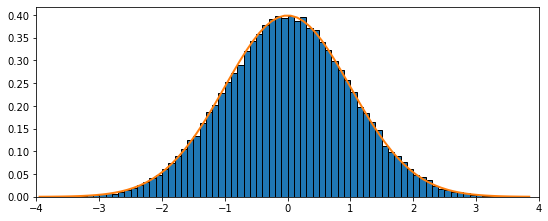

In [6]:
#Avec numpy

N=100000
x=[]
mu=0
sigma=1
x=np.random.normal(mu,sigma,N)
    
binwidth=0.1
pyplot.xlim(-4,4)
bins=np.arange(-4.,4., binwidth)
pyplot.hist(x,bins,density=True, ec='black');

xc = bins[:-1] + binwidth/2
normale = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((xc-mu)/sigma)**2)
pyplot.plot(xc,normale, lw=2)

pyplot.show()

Comme précédement, les 2 graphiques sont quasiment indissociable. Ceci nous confirme l'équivalence entre les méthodes.

## Challenge 2

Pour ce challenge, il nous est demandé de nous renseigner sur l'algorithme de Box-Muller, qui permet lui aussi de générer une paire de nombres selon la loi normale.

Pour être plus exacte, la méthode de Box-Muller génère des paires de nombres aléatoires à distribution normales à partir d'une source de nombres aléatoires de loi uniforme.

Soient $U_1$ et $U_2$ deux variables aléatoires indépendantes uniformément distribuées dans \]0,1\].

Soient, $$Z_0=\sqrt{-2lnU_1}cos(2\pi U_2)$$ et $$Z_1=\sqrt{-2lnU_1}sin(2\pi U_2)$$

alors $Z_0$ et $Z_1$ sont des variables aléatoires indépendantes suivant une loi normale centrée. Implémetons ceci dans Python à l'aide d'une fonction.

In [7]:
# Box-Muller

def Box_Muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

Regardons ensuite à l'aide de graphiques si nous tombons bien sur le résultat souhaité, c'est à dire des variables aléatoires indépendantes suivant la loi normale centrée.

In [8]:
# Generation des paires de nombres aléatoires à distribution normale centrée réduite

N=100000
x=[]
y=[]
for i in range(N):
    x1, y1 = Box_Muller(np.random.random_sample(),np.random.random_sample())
    x.append(x1)
    y.append(y1)


binwidth=0.5
bins=np.arange(-11.,11., binwidth)

z = bins[:-1] + binwidth/2

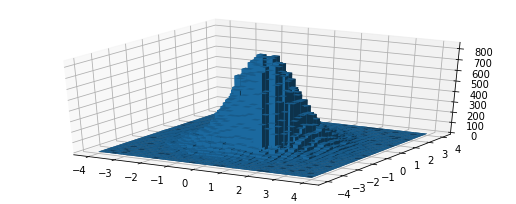

In [9]:
from mpl_toolkits.mplot3d import Axes3D 

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=(35,35), range = [[-4,+4],[-4,+4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])

xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')


pyplot.show()

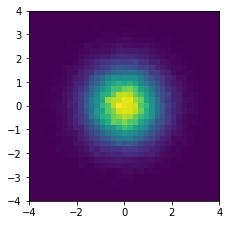

In [10]:
# Meme histogramme vu d'en haut avec "heatmap"

heatmap, xedges, yedges = np.histogram2d(x, y, bins = 35, range = [[-4,4],[-4,4]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


pyplot.imshow(heatmap.T, extent=extent, origin='lower')
pyplot.show()

Un graphique à trois dimensions a été utilisé pour représenter les deux variables aléatoires simultanément.
On observe en effet le comportement attendu pour les deux variables respectant tout deux une distribution normale centrée. Isolons une des deux variables pour observer un graphique plus familier.

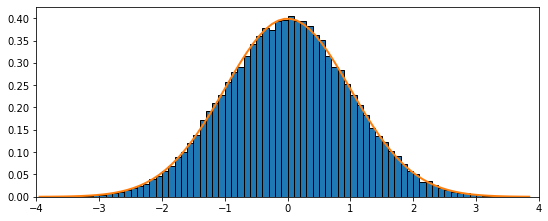

In [11]:
# Confirmation de generation loi normale correcte

binwidth=0.1
pyplot.xlim(-4,4)
bins=np.arange(-4.,4., binwidth)
pyplot.hist(x,bins,density=True, ec='black');

xc = bins[:-1] + binwidth/2
normale = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((xc-mu)/sigma)**2)
pyplot.plot(xc,normale, lw=2)

pyplot.rcParams["figure.figsize"] = (9,3.5)

pyplot.show()

# 2. 06_03_brownianMotion_2

## Challenge 1

Ce premier challenge nous demande d'ajouter une contribution systématique au modèle du mouvement Brownian. Voici l'équation de ce nouveau modèle :

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

Commençons par initiliser les positions de nos échantillons de molécules et vérifions que leurs positions sont distribuées comme prévu.

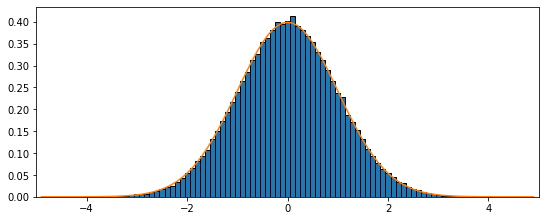

In [12]:
npart=100000

mu=0
sigma = 1.0
x0 = np.random.normal(loc=mu,scale=sigma,size=npart)

# Generation de bins autour de 0
binwidth=0.1
bins=np.arange(-5,5,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

# Plot de l'histogramme et la distribution attendue
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,density=True, ec='black');
pyplot.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))

pyplot.rcParams["figure.figsize"] = (9,3.5)

pyplot.show()

  Voici l'illustration des trajectoires des 20 premières molécules après avoir ajouter notre conditions systématiques.

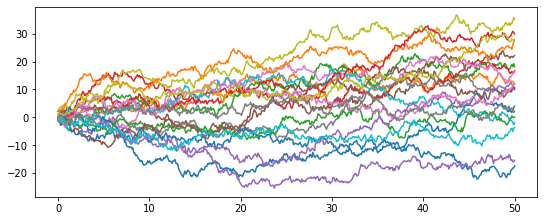

In [13]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

mu=0
sigma=1
c=0.1

t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(mu,sigma,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

Pour voir quel est l'effet de cette condition sur les positions initiales, plottons les nouvelles positions de notre échantillons. Je laisserai, tracé en orange, la distribution normale centrée, ayant pour but de montrer le changement vis à vis du premier modèle.

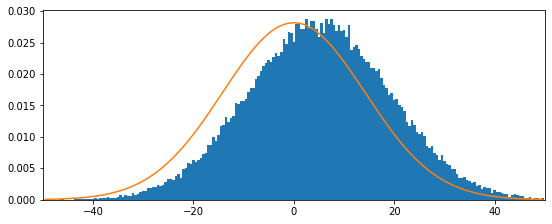

In [14]:
# Generation de bins autour de 0
binwidth=0.5
bins=np.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot de l'histogramme
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

pyplot.rcParams["figure.figsize"] = (9,3.5)

pyplot.show()

On remarque qu'on à une translation précisement de $cT$ en comparaisont à la loi normale centrée. Appliquons ce changement à notre courbe et on verra qu'en effet, la courbe et l'histogramme concordent.

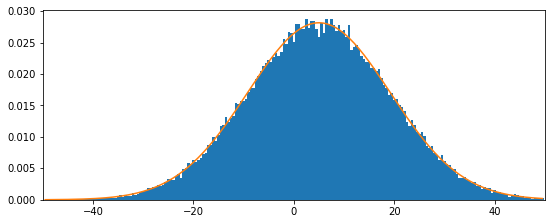

In [15]:
# plot a histrogram for verification
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, np.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

## Challenge 2

Même question que précédemment sauf que nous ajoutons maintenant un terme de friction : 

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Nous procédons les mêmes étapes que précédemment, je me permetrai de moins détailler les éléments se répétant du challenge précédant.

In [16]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

mu=0
sigma=1

gamma=1

t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]-gamma*x[i]*dt+np.sqrt(2*alpha*dt)*np.random.normal(mu,sigma,npart)

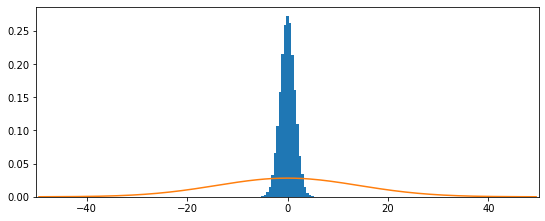

In [17]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

pyplot.rcParams["figure.figsize"] = (9,3.5)

pyplot.show()

Notre gaussienne est complétement écrabouillée, ce terme de friction empèche complétement l'étalement. Par contre, le sommet de la gaussienne est de fait beaucoup plus élevée.

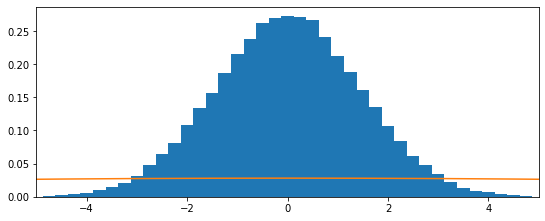

In [18]:
# zoom sur la gaussienne

binwidth=0.25
bins=np.arange(-5,5,binwidth)
bins = bins + binwidth/2


pyplot.xlim(-5,5)
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

pyplot.rcParams["figure.figsize"] = (9,3.5)

pyplot.show()

# 3. 06_04_Ising_Model

## Challenge 1


Il est demandé de confirmer que l'algorithme de metropolis nous donne en effet le correct ratio de "ups" et "downs" pour différentes configurations de quadrillages. Pour ce faire, nous utiliserons plusieurs fonctions données dans le notebook et nous allons définir quelques constantes dans la cellule suivante.

In [4]:
nx=10
ny=10

alpha = 0.1

def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]



La prochaine cellule définit une fonction qui nous permettra de générer une configuration aléatoire de 1 et de -1 dans un quadrillage.

In [5]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

Nous avons tout ce qu'il nous faut pour comparer nos deux ratios. Théoriquement, notre système devrait respecter la formule suivante :
$$\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}$$
Nous allons diviser le membre de gauche par le menbre de droite et espérer tomber sur un coefficient autour de l'unité. On va ensuite répéter la comparaison plusieur fois pour assurer le respect de la loi. Voyons celà :

In [22]:
NMC = 100000
alpha=0.1

sp = initial_state(10,10)
states = np.empty(NMC+1)
states[0]=sp[5,5]

delta_E = -1*energy_at_site(sp,alpha,1,5,5)+energy_at_site(sp,alpha,-1,5,5)

theory = np.exp(delta_E)

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = np.extract(states==1, states).size
downs = NMC - ups
exp = ups / downs
print(exp/theory)

1.00230208700069


On remarque avoir un parfait ratio entre l'expérimental et la théorie, voyons si ce résultat est concerver si on itère le processus.

In [23]:
n = 10
liste = []
listeup = []
listedown = []
theory = []
NMC = 100000
alpha=0.1

for i in range(n):
    liste.append(initial_state(10,10))     #configuration de plusieurs quadrillages différents

for i in range(n):
    sp = liste[i]
    states = np.empty(NMC+1)
    states[0]=sp[5,5]
    delta_E = -1*energy_at_site(sp,alpha,1,5,5)+energy_at_site(sp,alpha,-1,5,5)
    
    theory.append(np.exp(delta_E))

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]
    
    ups = np.extract(states==1, states).size
    downs = NMC - ups
    listeup.append(ups)
    listedown.append(downs)
    
#exp pour experimental
exp = np.array(listeup)/np.array(listedown)
print(exp/theory)

[1.00090626 1.00330436 1.         0.99496426 1.         1.
 0.99651856 0.9978482  1.00223983 0.99885264]


On a bien le résultat voulu, tout nos coefficient sont autour de 1.

## Challenge 2

Pour ce challenge, il est demandé de calculer l'énergie moyenne d'un système et sa magnétisation moyenne comme fonction de $\alpha$, où $\alpha \in [0,1]$. Pour ce faire, nous devons utiliser la fonction "ising_model_metropolis" définie dans le notebook. Là voici :

In [24]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Nous allons ensuite calculer la moyenne de l'énergie pour chaques valeurs de alpha. Une boucle sur alpha est donc nécéssaire, ici, cette boucle ira de 0 à 1 en 100 pas. Nous stockerons ensuite chaque valeur moyenne de l'énergie dans une liste.

In [23]:
alpha = 0
NMC=1000
nx=10
ny=10
E_moy_list = []


while alpha<1:

    E_list = []
    sp=initial_state(nx,ny)
    
    states_alpha = ising_model_metropolis(sp,NMC,nx,ny,alpha)

    for l in range(len(sp)):
        E=0
        
        for i in range(nx):
            for j in range(ny):
                E+=energy_at_site(states_alpha[l], alpha, states_alpha[l][i,j],i,j)
            E_list.append(E)
    
    #moyenne de l'energie
    E_moy = 0
    for i in range(len(E_list)):
        E_moy+=E_list[i]
    E_moy_list.append(E_moy/len(E_list))
    
    alpha+=0.01

Plottons le résultat. Remarquons que nous utilisons linspace pour créer notre abscisse, ceci n'est pas un problème car nos itérations sur alpha effectué précédemment sont exactement équivalentes à ce linspace.

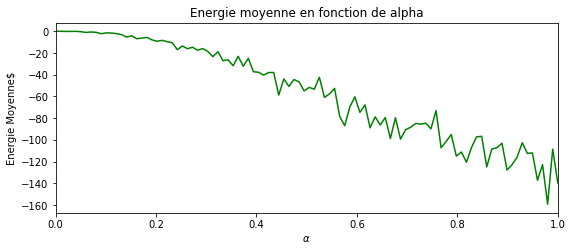

In [34]:
pyplot.xlim(0,1)
pyplot.plot(np.linspace(0,1,100),np.array(E_moy_list),'g')

pyplot.xlabel(r'$\alpha$')
pyplot.ylabel('Energie Moyenne$')
pyplot.rcParams["figure.figsize"] = (9,3.5)
pyplot.title('Energie moyenne en fonction de alpha')

pyplot.show()

En ce qui concerne la magnétisation, nous procédons de manière totalement équivalente. L'unique changement étant que nous sommons sur les valeurs de la magnétisation.

In [25]:
alpha = 0
NMC=100
nx=10
ny=10
M_moy_list = []


while alpha<1:

    M_list = []
    sp=initial_state(nx,ny)
    
    states_alpha = ising_model_metropolis(sp,NMC,nx,ny,alpha)

    for l in range(len(sp)):
        M=0

        for i in range(nx):
            for j in range(ny):
                M+=states_alpha[l][i,j]
            M_list.append(M)
    
    M_moy = 0
    for i in range(len(M_list)):
        M_moy+=M_list[i]
    M_moy_list.append(M_moy/len(M_list))
    alpha+=0.01

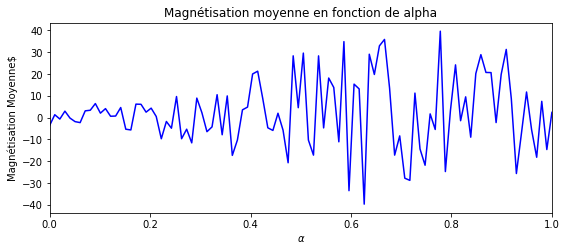

In [33]:
pyplot.xlim(0,1)
pyplot.plot(np.linspace(0,1,100),np.array(M_moy_list),'b')

pyplot.xlabel(r'$\alpha$')
pyplot.ylabel('Magnétisation Moyenne$')
pyplot.rcParams["figure.figsize"] = (9,3.5)
pyplot.title('Magnétisation moyenne en fonction de alpha')

pyplot.show()

En analysant les deux graphiques, il est dificile de déterminer une valeur pour $\alpha_c$ (i.e. alpha critique). Poussons un peu l'analyse plus loins en augmentant le nombre NMC à 1000 en espérant avoir une valeur plus précise.

#### Attention
Avant de lancer la prochaine cellule, gardez en tête que celle-ci pourrait mettre longtemps avant d'afficher un résultat, dépendant de la puissance de votre CPU.

In [216]:
alpha = 0
NMC=1000
nx=10
ny=10
M_moy_list = []


while alpha<1:

    M_list = []
    sp=initial_state(nx,ny)
    
    states_alpha = ising_model_metropolis(sp,NMC,nx,ny,alpha)

    for l in range(len(sp)):
        M=0

        for i in range(nx):
            for j in range(ny):
                M+=states_alpha[l][i,j]

            M_list.append(M)
    M_moy = 0
    for i in range(len(M_list)):
        M_moy+=M_list[i]
    M_moy_list.append(M_moy/len(M_list))
    alpha+=0.01

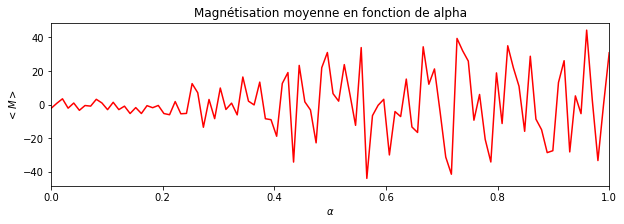

In [217]:
pyplot.xlim(0,1)
pyplot.plot(np.linspace(0,1,100),np.array(M_moy_list),'r')

pyplot.xlabel(r'$\alpha$')
pyplot.ylabel(r'$<M>$')
pyplot.rcParams["figure.figsize"] = (10,3)
pyplot.title('Magnétisation moyenne en fonction de alpha')

pyplot.show()

Malheureusement, d'augmenter NMC d'un facteur 10 n'augmente pas drastiquement la précision de notre graphique. Par manque de puissance informatique, nous nous arretrons la, mais d'augmenter encore NMC jusqu'à disons 100000 où plus encore, ceci nous permettrais d'avoir la valeur critique attendue. 

Pour notre analyse, nous remarquerons que la valeur de $\alpha_c$ se trouve aux alentours de $0.45$ en nous basant lourdement sur le plot de l'énergie moyenne, ce qui semble à concorder avec le plot de la magnétisation moyenne. La valeur voulue étant $$\alpha=\frac{J}{K_B T}=0.4406...$$

Nous pouvons conclure que nous sommes dans la bonne région.

#### Source : 

https://fr.wikipedia.org/wiki/Méthode_de_Box-Muller

https://glowingpython.blogspot.com/2013/01/box-muller-transformation.html

https://docs.python.org/3/library/random.html

numerical-mooc-MonteCarlo